In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [593]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col=0)
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv', index_col=0)

In [594]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [595]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Removing missing values

In [596]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_data.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

### First, let's remove variables with most of the values missing

In [597]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

In [598]:
df = pd.concat([X , test_data])
df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu'], axis=1)

In [599]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


In [600]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum())

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

In [601]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [602]:
df.MSZoning[df["Neighborhood"] == "IDOTRR"]

Id
22           RM
31      C (all)
53           RM
62           RM
89      C (all)
         ...   
2890         RM
2891         RM
2892    C (all)
2893    C (all)
2894    C (all)
Name: MSZoning, Length: 93, dtype: object

In [603]:
df.groupby('MSSubClass')['LotFrontage'].apply(lambda x: x.isnull().sum()).to_dict()

{20: 185,
 30: 13,
 40: 1,
 45: 0,
 50: 25,
 60: 133,
 70: 11,
 75: 2,
 80: 33,
 85: 16,
 90: 17,
 120: 32,
 150: 1,
 160: 12,
 180: 1,
 190: 4}

In [604]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [605]:
df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [233]:
# df['Electrical'] = df["Electrical"].fillna(df.Electrical.mode())

In [606]:
categorical_columns = df.select_dtypes(exclude=['int64','float64']).columns

In [607]:
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [611]:
df[categorical_columns] = df.groupby('Neighborhood')[categorical_columns].transform(lambda x: x.fillna(x.mode()[0]))   
df = df.fillna(0)

In [314]:
# numeric_missed = ['BsmtFinSF1',
#                   'BsmtFinSF2',
#                   'BsmtUnfSF',
#                   'TotalBsmtSF',
#                   'BsmtFullBath',
#                   'BsmtHalfBath',
#                   'GarageYrBlt',
#                   'GarageArea',
#                   'GarageCars',
#                   'MasVnrArea']
# for feature in numeric_missed:
#     df[feature] = df[feature].fillna(0)

In [353]:
# df = df.transform(lambda x: x.fillna(x.mean()[0]))   

## Fix skewness

<AxesSubplot:>

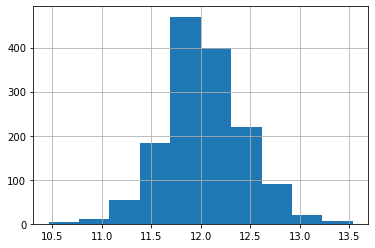

In [612]:
y = np.log1p(y)
y.hist()

In [613]:
from scipy.stats import norm, skew

In [614]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew.head(50)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.505704
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

In [615]:
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

## Let's add new features

In [616]:
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## Adding categorical columns

In [617]:
df = pd.get_dummies(df)


### Delete variables with low correlation with the price

In [618]:
corr = train_data.corr()["SalePrice"]

In [619]:
corr[abs(corr) < 0.04]

BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
BsmtHalfBath   -0.016844
MiscVal        -0.021190
YrSold         -0.028923
Name: SalePrice, dtype: float64

In [620]:
low_corr = ["BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "MiscVal", "YrSold"]

In [621]:
df = df.drop(low_corr, axis=1)

### Divide into train and test

In [622]:
train = df[:len(train_data)]
test = df[len(train_data):]

In [623]:
print(train.shape, test.shape, train_data.shape)

(1460, 269) (1459, 269) (1460, 80)


In [624]:
X = train

In [625]:
y

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
1456    12.072547
1457    12.254868
1458    12.493133
1459    11.864469
1460    11.901590
Name: SalePrice, Length: 1460, dtype: float64

## Training

In [626]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [627]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
893,3.044522,4.262680,9.037771,6,2.197225,7.582738,2003,0.000000,6.498282,5.983936,...,0,0,0,1,0,0,0,0,1,0
1106,4.110874,4.595120,9.413852,8,1.791759,7.598399,1995,5.894403,6.940222,6.068426,...,0,0,0,1,0,0,0,0,1,0
414,3.433987,4.043051,9.100637,5,1.945910,7.564238,1950,0.000000,0.000000,6.916715,...,0,0,0,1,0,0,0,0,1,0
523,3.931826,3.931826,8.517393,6,2.079442,7.574558,1950,0.000000,5.991465,6.406880,...,0,0,0,1,0,0,0,0,1,0
1037,3.044522,4.499810,9.464905,9,1.791759,7.604894,2008,4.262680,6.930495,6.395262,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,3.931826,4.753590,9.965852,5,1.791759,7.575072,1950,0.000000,0.000000,6.580639,...,0,0,0,1,0,0,0,0,1,0
391,3.931826,3.931826,9.036701,5,2.197225,7.550135,1950,0.000000,5.488938,5.438079,...,0,0,0,1,0,0,0,0,1,0
1410,4.110874,3.850148,9.930373,7,1.945910,7.594381,1991,4.820282,0.000000,6.674561,...,0,0,0,1,0,0,0,0,1,0


In [628]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [629]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)


In [630]:
from catboost import CatBoostRegressor

In [631]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.038876
0:	learn: 0.3833709	total: 9.75ms	remaining: 9.74s
1:	learn: 0.3743899	total: 16ms	remaining: 8s
2:	learn: 0.3645356	total: 25.9ms	remaining: 8.61s
3:	learn: 0.3560999	total: 33ms	remaining: 8.22s
4:	learn: 0.3482212	total: 38.8ms	remaining: 7.72s
5:	learn: 0.3412538	total: 45.1ms	remaining: 7.47s
6:	learn: 0.3342357	total: 51.1ms	remaining: 7.25s
7:	learn: 0.3272557	total: 57ms	remaining: 7.07s
8:	learn: 0.3196502	total: 62.6ms	remaining: 6.89s
9:	learn: 0.3126172	total: 69.5ms	remaining: 6.88s
10:	learn: 0.3063881	total: 77ms	remaining: 6.92s
11:	learn: 0.2999533	total: 82.2ms	remaining: 6.77s
12:	learn: 0.2936853	total: 87.4ms	remaining: 6.64s
13:	learn: 0.2871153	total: 92.4ms	remaining: 6.5s
14:	learn: 0.2817402	total: 97.7ms	remaining: 6.41s
15:	learn: 0.2758431	total: 105ms	remaining: 6.43s
16:	learn: 0.2707324	total: 112ms	remaining: 6.48s
17:	learn: 0.2658380	total: 117ms	remaining: 6.4s
18:	learn: 0.2605690	total: 122ms	remaining: 6.3s
19:	learn:

171:	learn: 0.0973139	total: 1.19s	remaining: 5.74s
172:	learn: 0.0972274	total: 1.21s	remaining: 5.78s
173:	learn: 0.0970129	total: 1.23s	remaining: 5.85s
174:	learn: 0.0967459	total: 1.24s	remaining: 5.84s
175:	learn: 0.0965652	total: 1.25s	remaining: 5.85s
176:	learn: 0.0963838	total: 1.26s	remaining: 5.87s
177:	learn: 0.0960424	total: 1.27s	remaining: 5.89s
178:	learn: 0.0958438	total: 1.28s	remaining: 5.89s
179:	learn: 0.0955617	total: 1.29s	remaining: 5.88s
180:	learn: 0.0953664	total: 1.3s	remaining: 5.89s
181:	learn: 0.0951711	total: 1.31s	remaining: 5.89s
182:	learn: 0.0950661	total: 1.31s	remaining: 5.87s
183:	learn: 0.0949264	total: 1.32s	remaining: 5.85s
184:	learn: 0.0947340	total: 1.33s	remaining: 5.85s
185:	learn: 0.0946281	total: 1.33s	remaining: 5.83s
186:	learn: 0.0944403	total: 1.34s	remaining: 5.82s
187:	learn: 0.0942271	total: 1.34s	remaining: 5.8s
188:	learn: 0.0940434	total: 1.35s	remaining: 5.79s
189:	learn: 0.0938644	total: 1.35s	remaining: 5.77s
190:	learn: 0.

340:	learn: 0.0729889	total: 2.16s	remaining: 4.17s
341:	learn: 0.0728377	total: 2.17s	remaining: 4.17s
342:	learn: 0.0727167	total: 2.17s	remaining: 4.16s
343:	learn: 0.0726084	total: 2.18s	remaining: 4.15s
344:	learn: 0.0725299	total: 2.18s	remaining: 4.15s
345:	learn: 0.0724196	total: 2.19s	remaining: 4.14s
346:	learn: 0.0722996	total: 2.19s	remaining: 4.13s
347:	learn: 0.0722016	total: 2.2s	remaining: 4.12s
348:	learn: 0.0721773	total: 2.21s	remaining: 4.12s
349:	learn: 0.0720380	total: 2.21s	remaining: 4.11s
350:	learn: 0.0719298	total: 2.22s	remaining: 4.11s
351:	learn: 0.0717732	total: 2.23s	remaining: 4.1s
352:	learn: 0.0717433	total: 2.23s	remaining: 4.09s
353:	learn: 0.0716230	total: 2.24s	remaining: 4.09s
354:	learn: 0.0716081	total: 2.25s	remaining: 4.08s
355:	learn: 0.0715301	total: 2.25s	remaining: 4.08s
356:	learn: 0.0714351	total: 2.26s	remaining: 4.07s
357:	learn: 0.0712919	total: 2.26s	remaining: 4.06s
358:	learn: 0.0712580	total: 2.27s	remaining: 4.05s
359:	learn: 0.

515:	learn: 0.0575724	total: 3.13s	remaining: 2.94s
516:	learn: 0.0575192	total: 3.14s	remaining: 2.93s
517:	learn: 0.0574172	total: 3.14s	remaining: 2.92s
518:	learn: 0.0574052	total: 3.15s	remaining: 2.92s
519:	learn: 0.0572716	total: 3.16s	remaining: 2.91s
520:	learn: 0.0571630	total: 3.16s	remaining: 2.91s
521:	learn: 0.0571508	total: 3.17s	remaining: 2.9s
522:	learn: 0.0571395	total: 3.17s	remaining: 2.89s
523:	learn: 0.0570682	total: 3.18s	remaining: 2.89s
524:	learn: 0.0569843	total: 3.18s	remaining: 2.88s
525:	learn: 0.0569277	total: 3.19s	remaining: 2.87s
526:	learn: 0.0568673	total: 3.19s	remaining: 2.87s
527:	learn: 0.0567764	total: 3.2s	remaining: 2.86s
528:	learn: 0.0567029	total: 3.2s	remaining: 2.85s
529:	learn: 0.0566169	total: 3.21s	remaining: 2.84s
530:	learn: 0.0565339	total: 3.21s	remaining: 2.84s
531:	learn: 0.0564603	total: 3.22s	remaining: 2.83s
532:	learn: 0.0563824	total: 3.22s	remaining: 2.82s
533:	learn: 0.0563265	total: 3.23s	remaining: 2.81s
534:	learn: 0.0

700:	learn: 0.0465526	total: 4.1s	remaining: 1.75s
701:	learn: 0.0465195	total: 4.1s	remaining: 1.74s
702:	learn: 0.0464908	total: 4.11s	remaining: 1.74s
703:	learn: 0.0464419	total: 4.12s	remaining: 1.73s
704:	learn: 0.0464074	total: 4.12s	remaining: 1.72s
705:	learn: 0.0463439	total: 4.13s	remaining: 1.72s
706:	learn: 0.0463297	total: 4.13s	remaining: 1.71s
707:	learn: 0.0463252	total: 4.14s	remaining: 1.71s
708:	learn: 0.0462542	total: 4.14s	remaining: 1.7s
709:	learn: 0.0461836	total: 4.15s	remaining: 1.69s
710:	learn: 0.0461479	total: 4.15s	remaining: 1.69s
711:	learn: 0.0460855	total: 4.16s	remaining: 1.68s
712:	learn: 0.0460244	total: 4.16s	remaining: 1.67s
713:	learn: 0.0459561	total: 4.17s	remaining: 1.67s
714:	learn: 0.0458863	total: 4.17s	remaining: 1.66s
715:	learn: 0.0458799	total: 4.17s	remaining: 1.66s
716:	learn: 0.0457914	total: 4.18s	remaining: 1.65s
717:	learn: 0.0457703	total: 4.18s	remaining: 1.64s
718:	learn: 0.0456802	total: 4.19s	remaining: 1.64s
719:	learn: 0.0

894:	learn: 0.0375264	total: 5.06s	remaining: 594ms
895:	learn: 0.0375106	total: 5.07s	remaining: 588ms
896:	learn: 0.0374904	total: 5.07s	remaining: 583ms
897:	learn: 0.0374297	total: 5.08s	remaining: 577ms
898:	learn: 0.0373982	total: 5.09s	remaining: 571ms
899:	learn: 0.0373383	total: 5.09s	remaining: 566ms
900:	learn: 0.0372842	total: 5.1s	remaining: 560ms
901:	learn: 0.0372267	total: 5.1s	remaining: 554ms
902:	learn: 0.0371716	total: 5.11s	remaining: 549ms
903:	learn: 0.0371118	total: 5.11s	remaining: 543ms
904:	learn: 0.0370998	total: 5.12s	remaining: 537ms
905:	learn: 0.0370542	total: 5.12s	remaining: 531ms
906:	learn: 0.0370370	total: 5.13s	remaining: 526ms
907:	learn: 0.0369785	total: 5.13s	remaining: 520ms
908:	learn: 0.0369456	total: 5.14s	remaining: 514ms
909:	learn: 0.0369078	total: 5.14s	remaining: 508ms
910:	learn: 0.0368331	total: 5.15s	remaining: 503ms
911:	learn: 0.0367928	total: 5.15s	remaining: 497ms
912:	learn: 0.0367673	total: 5.16s	remaining: 491ms
913:	learn: 0.

In [632]:
prediction_cb = catboost.predict(X_test)

## Choosing the best parametres 

### Random Forest

In [26]:
reg_rf = RandomForestRegressor()

In [27]:
parametrs = {'n_estimators': [10,15, 22, 24, 26], 'max_depth' : [7, 10, 13, 15], 
             'min_samples_leaf': range(1, 5)}

In [28]:
grid_search_cv_reg = GridSearchCV(reg_rf, parametrs, cv=5)

In [29]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
616,85,80.0,8800,6,7,1963,1963,156.0,763.0,0.0,...,0,0,0,1,1,0,0,0,0,0
614,20,70.0,8402,5,5,2007,2007,0.0,206.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1304,20,73.0,8688,7,5,2005,2005,228.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
487,20,79.0,10289,5,7,1965,1965,168.0,836.0,0.0,...,0,0,0,1,0,0,0,0,1,0
562,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,78.0,9317,6,5,2006,2006,0.0,24.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1131,50,65.0,7804,4,3,1928,1950,0.0,622.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1295,20,60.0,8172,5,7,1955,1990,0.0,167.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [106]:
y_train

Id
616     11.831386
614     11.898195
1304    12.354497
487     11.957618
562     12.043560
          ...    
1096    12.080696
1131    11.813037
1295    11.652696
861     12.154521
1127    12.066816
Name: SalePrice, Length: 978, dtype: float64

In [31]:
grid_search_cv_clf.fit(X_train, y_train)

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13, 15],
                         'min_samples_leaf': range(1, 5),
                         'n_estimators': [10, 15, 22, 24, 26]})

In [91]:
grid_search_cv_clf.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 26}

In [32]:
best_clf = grid_search_cv_clf.best_estimator_

In [33]:
best_clf.score(X_test, y_test)

0.006224066390041493

In [34]:
predict = best_clf.predict(X_test)

In [35]:
predict.shape

(482,)

### CatBoost

In [523]:
# def catBoost(X_train, y_train, X_test):
#     catM = CatBoostRegressor(verbose=0, allow_writing_files=False)
#     params = {'learning_rate': [0.01, 0.05, 0.005, 0.0005],
#               'depth': [4, 6, 10],
#               'l2_leaf_reg': [1, 2, 3, 5, 9]}

#     grid_search_cat = RandomizedSearchCV(estimator=catM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=10, cv=4, verbose=2,
#                                      random_state=42, n_jobs=-1)
#     grid_search_cat.fit(X_train, y_train)
#     catModel = grid_search_cat.best_estimator_
#     print('Best params(CatBoost):',grid_search_cat.best_params_)
#     print('RMSE(CatBoost):', -grid_search_cat.best_score_)
#     return catModel

In [665]:
from sklearn.model_selection import RandomizedSearchCV
catM = CatBoostRegressor(verbose=0, allow_writing_files=False)
params = {'learning_rate': [0.01, 0.05, 0.005, 0.0005],
          'depth': [3, 4, 6],
          'l2_leaf_reg': [1, 2, 3, 5, 9]}



In [667]:
grid_search_cat = RandomizedSearchCV(estimator=catM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=10, cv=4, verbose=2,
                                 random_state=42, n_jobs=-1)
grid_search_cat.fit(X_train, y_train)
catModel = grid_search_cat.best_estimator_
print('Best params(CatBoost):',grid_search_cat.best_params_)
print('RMSE(CatBoost):', -grid_search_cat.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished


Best params(CatBoost): {'learning_rate': 0.05, 'l2_leaf_reg': 2, 'depth': 6}
RMSE(CatBoost): 0.12521162075962206


In [591]:
#catModel = catBoost(X_train, y_train, X_test)
# catModel = CatBoostRegressor(verbose=0, allow_writing_files=False, learning_rate=0.05, l2_leaf_reg=2, depth=4)


In [668]:
catModel.fit(X_train, y_train)
prediction_cb_best = catModel.predict(X_test)

### Calculate error

In [36]:
from sklearn.metrics import mean_squared_log_error


In [333]:
np.expm1(prediction)

array([138405.80095912, 320173.9444338 , 115959.00262958, 148894.65394112,
       305486.86111991,  81651.20807597, 208696.31232981, 150876.00027458,
        80498.32939055, 123118.0476211 , 166896.05274718, 119409.75541572,
       104401.34985422, 209039.21517679, 177844.1261156 , 127428.57122672,
       191278.95786384, 135244.55091827, 114615.44449724, 210555.29612191,
       171752.21032987, 223659.94105583, 174325.78273919, 122941.89263885,
       197356.57477477, 165632.4217141 , 179718.88822531, 101702.07205091,
       178146.95688357, 198092.85586961, 126429.28341588, 250410.67679378,
       167153.02998468, 111827.09154982, 254551.01551594, 148265.80067311,
       135748.87311322, 207268.62381629, 309394.84432446, 107994.79945016,
       124101.99693578, 231244.7027839 , 119072.84081621, 343085.25451686,
       139888.77780195, 129719.34654831, 118276.71260193, 128420.02888938,
       385330.76251161, 137774.87244676, 119937.28389156, 188847.9040185 ,
       115374.28283377, 3

In [334]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
1010    11.813037
390     11.686887
1409    12.278398
847     11.801864
1284    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [566]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_rf)))

0.14329035681107322

In [652]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb)))

0.12478220670306507

In [669]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb_best)))

0.12313730305289335

In [654]:
y_test

Id
893     11.947956
1106    12.691584
414     11.652696
523     11.976666
1037    12.661917
          ...    
1011    11.813037
391     11.686887
1410    12.278398
848     11.801864
1285    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [670]:
y_pred = catModel.predict(test)
# y_pred = catboost.predict(test)

In [671]:
y_pred

array([11.74486556, 11.95617082, 12.15743126, ..., 11.97794237,
       11.65444953, 12.31474799])

In [672]:
sample = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [673]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [674]:
tmp = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [675]:
tmp['SalePrice'] = np.expm1(y_pred)

In [676]:
y_pred.shape

(1459,)

In [677]:
pred_df = tmp[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [678]:
pred_df

,SalePrice
Id,
1461,126103.417985
1462,155774.449251
1463,190503.531739
1464,199604.906166
1465,192558.650270
...,...
2915,80331.472803
2916,84500.895789
2917,159203.109885


In [679]:
pred_df.to_csv('out.csv')

In [126]:
y

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64